In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on lat and long
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of lat and long
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Id nearest city for each lat, lng comb
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If city unique, add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm count
len(cities)
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng comb
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Id nearest city for each lat, lng comb
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print city count to confirm count
len(cities)

615

In [3]:
# Starting URL for Openweathermap API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City info into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jahrom
City not found. Skipping...
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | ca mau
Processing Record 4 of Set 1 | barauna
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | toliary
City not found. Skipping...
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | nome
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | touros
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | los llanos de aridane
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | tsihombe
Ci

Processing Record 38 of Set 4 | ketchikan
Processing Record 39 of Set 4 | lompoc
Processing Record 40 of Set 4 | korem
Processing Record 41 of Set 4 | baherden
Processing Record 42 of Set 4 | eureka
Processing Record 43 of Set 4 | faanui
Processing Record 44 of Set 4 | dese
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | grants
Processing Record 47 of Set 4 | la maddalena
Processing Record 48 of Set 4 | nanortalik
Processing Record 49 of Set 4 | adrar
Processing Record 0 of Set 5 | itacare
Processing Record 1 of Set 5 | northam
Processing Record 2 of Set 5 | caucasia
Processing Record 3 of Set 5 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 4 of Set 5 | nelson bay
Processing Record 5 of Set 5 | dole
Processing Record 6 of Set 5 | jalu
Processing Record 7 of Set 5 | evensk
Processing Record 8 of Set 5 | luang prabang
Processing Record 9 of Set 5 | saldanha
Processing Record 10 of Set 5 | mahajanga
Processing Record 11 of Set 5 | geraldton
Pr

Processing Record 30 of Set 8 | jardim
Processing Record 31 of Set 8 | san nicolas
Processing Record 32 of Set 8 | prince rupert
Processing Record 33 of Set 8 | riyadh
Processing Record 34 of Set 8 | qinnan
Processing Record 35 of Set 8 | dabakala
Processing Record 36 of Set 8 | lasa
Processing Record 37 of Set 8 | ningbo
Processing Record 38 of Set 8 | dzilam gonzalez
Processing Record 39 of Set 8 | vardo
Processing Record 40 of Set 8 | auki
Processing Record 41 of Set 8 | belvidere
Processing Record 42 of Set 8 | sabla
Processing Record 43 of Set 8 | ust-ilimsk
Processing Record 44 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 45 of Set 8 | red wing
Processing Record 46 of Set 8 | skjervoy
Processing Record 47 of Set 8 | richards bay
Processing Record 48 of Set 8 | kahului
Processing Record 49 of Set 8 | conil
Processing Record 0 of Set 9 | tshela
Processing Record 1 of Set 9 | partizanskoye
Processing Record 2 of Set 9 | california city
Processing Record 3 of Set

Processing Record 20 of Set 12 | samusu
City not found. Skipping...
Processing Record 21 of Set 12 | pudem
Processing Record 22 of Set 12 | korla
Processing Record 23 of Set 12 | beloha
Processing Record 24 of Set 12 | state college
Processing Record 25 of Set 12 | maraa
Processing Record 26 of Set 12 | orlik
Processing Record 27 of Set 12 | grindsted
Processing Record 28 of Set 12 | gull lake
Processing Record 29 of Set 12 | duluth
Processing Record 30 of Set 12 | opuwo
Processing Record 31 of Set 12 | diffa
Processing Record 32 of Set 12 | coelho neto
Processing Record 33 of Set 12 | andros town
Processing Record 34 of Set 12 | kushmurun
Processing Record 35 of Set 12 | college
Processing Record 36 of Set 12 | ankazobe
Processing Record 37 of Set 12 | sheksna
Processing Record 38 of Set 12 | cintalapa
Processing Record 39 of Set 12 | matara
Processing Record 40 of Set 12 | matay
Processing Record 41 of Set 12 | comodoro rivadavia
Processing Record 42 of Set 12 | katsuura
Processing R

Processing Record 40 of Set 3 | kulhudhuffushi
Processing Record 41 of Set 3 | kavieng
Processing Record 42 of Set 3 | avarua
Processing Record 43 of Set 3 | rafraf
Processing Record 44 of Set 3 | qitaihe
Processing Record 45 of Set 3 | bradulet
Processing Record 46 of Set 3 | camacha
Processing Record 47 of Set 3 | pakwach
City not found. Skipping...
Processing Record 48 of Set 3 | brae
Processing Record 49 of Set 3 | tuktoyaktuk
Processing Record 0 of Set 4 | marcona
City not found. Skipping...
Processing Record 1 of Set 4 | honiara
Processing Record 2 of Set 4 | yaguajay
Processing Record 3 of Set 4 | castro
Processing Record 4 of Set 4 | nizwa
Processing Record 5 of Set 4 | lolua
City not found. Skipping...
Processing Record 6 of Set 4 | warrnambool
Processing Record 7 of Set 4 | cherskiy
Processing Record 8 of Set 4 | soyo
Processing Record 9 of Set 4 | norman wells
Processing Record 10 of Set 4 | kruisfontein
Processing Record 11 of Set 4 | eldikan
City not found. Skipping...
Pro

Processing Record 31 of Set 7 | mutoko
Processing Record 32 of Set 7 | bograd
Processing Record 33 of Set 7 | pemberton
Processing Record 34 of Set 7 | eydhafushi
Processing Record 35 of Set 7 | krasnyy kurgan
Processing Record 36 of Set 7 | mweka
Processing Record 37 of Set 7 | gurupi
Processing Record 38 of Set 7 | banda aceh
Processing Record 39 of Set 7 | north bay
Processing Record 40 of Set 7 | mogzon
Processing Record 41 of Set 7 | martapura
Processing Record 42 of Set 7 | bandundu
Processing Record 43 of Set 7 | kez
Processing Record 44 of Set 7 | kidal
Processing Record 45 of Set 7 | inhambane
Processing Record 46 of Set 7 | khani
Processing Record 47 of Set 7 | mandalgovi
Processing Record 48 of Set 7 | nieuw amsterdam
Processing Record 49 of Set 7 | iguatu
Processing Record 0 of Set 8 | severo-kurilsk
Processing Record 1 of Set 8 | khonuu
City not found. Skipping...
Processing Record 2 of Set 8 | sao felix do xingu
Processing Record 3 of Set 8 | arlit
Processing Record 4 of 

Processing Record 21 of Set 11 | te anau
Processing Record 22 of Set 11 | broken hill
Processing Record 23 of Set 11 | diplo
Processing Record 24 of Set 11 | mantua
Processing Record 25 of Set 11 | sari
Processing Record 26 of Set 11 | yoichi
Processing Record 27 of Set 11 | puerto del rosario
Processing Record 28 of Set 11 | long branch
Processing Record 29 of Set 11 | ozernovskiy
Processing Record 30 of Set 11 | marstal
Processing Record 31 of Set 11 | ligayan
Processing Record 32 of Set 11 | kalabo
Processing Record 33 of Set 11 | bambanglipuro
Processing Record 34 of Set 11 | merauke
Processing Record 35 of Set 11 | necochea
Processing Record 36 of Set 11 | byron bay
Processing Record 37 of Set 11 | rio claro
Processing Record 38 of Set 11 | coria
Processing Record 39 of Set 11 | sydney
Processing Record 40 of Set 11 | santa ana
Processing Record 41 of Set 11 | saint-francois
Processing Record 42 of Set 11 | nicoya
Processing Record 43 of Set 11 | ahipara
Processing Record 44 of Se

In [4]:
#Convert array of JSONs into Pandaas DF
city_data_pd = pd.DataFrame(city_data)

#Show Count
city_data_pd.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
#Display the City DF
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.65,115.33,61.00,95,14,21.74,AU,1594860348
1,ca mau,9.18,105.15,82.49,81,74,3.31,VN,1594860759
2,barauna,-5.08,-37.62,72.88,74,24,10.11,BR,1594860819
3,carnarvon,-24.87,113.63,69.80,56,90,9.17,AU,1594860367
4,new norfolk,-42.78,147.06,46.99,87,97,0.69,AU,1594860372


In [6]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,21.017110,15.056410,67.800876,71.889667,48.136602,7.654291,1.594861e+09
std,32.914962,88.144669,13.943690,19.639204,40.627476,5.252847,2.417231e+02
min,-54.800000,-179.170000,28.400000,10.000000,0.000000,0.220000,1.594860e+09
25%,-5.030000,-59.660000,57.200000,62.000000,1.000000,3.750000,1.594860e+09
50%,24.470000,20.950000,70.140000,76.000000,40.000000,6.490000,1.594861e+09
75%,48.930000,86.365000,78.300000,86.000000,90.000000,10.290000,1.594861e+09
max,78.220000,179.320000,104.000000,100.000000,100.000000,29.970000,1.594861e+09


In [7]:
#Get indices of cities that have humidity > 100%
humid_city_data = city_data_pd[ (city_data_pd["Humidity"] > 100)].index
humid_city_data

Int64Index([], dtype='int64')

In [8]:
#Make a new DF equal to the city data to drop all humid. outliers
nohumid_city_data = city_data_pd.drop(humid_city_data, inplace=False)
nohumid_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.65,115.33,61.00,95,14,21.74,AU,1594860348
1,ca mau,9.18,105.15,82.49,81,74,3.31,VN,1594860759
2,barauna,-5.08,-37.62,72.88,74,24,10.11,BR,1594860819
3,carnarvon,-24.87,113.63,69.80,56,90,9.17,AU,1594860367
4,new norfolk,-42.78,147.06,46.99,87,97,0.69,AU,1594860372


In [9]:
#Extract relevant fields from DF
lats = nohumid_city_data["Lat"]
max_temps = nohumid_city_data["Max Temp"]
humidity = nohumid_city_data["Humidity"]
cloudiness = nohumid_city_data["Cloudiness"]
wind_speed = nohumid_city_data["Wind Speed"]

#Export into a csv
nohumid_city_data.to_csv(output_data_file, index_label="City_ID")

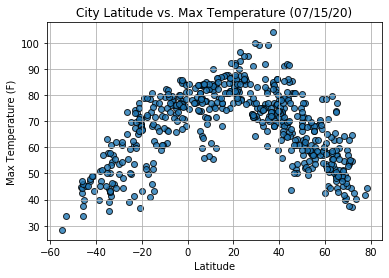

In [10]:
#Build scatter plot lat vs temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#other graph prop
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel ("Max Temperature (F)")
plt.xlabel ("Latitude")
plt.grid(True)

#Save fig
plt.savefig("output_data/Fig1.png")

#Show graph
plt.show()

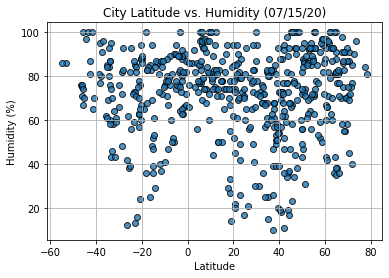

In [11]:
# Build scatter plots for lat vs. humid
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

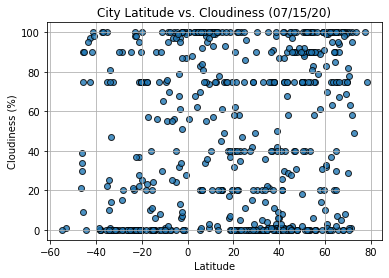

In [12]:
# Build the scatter plots for lat vs. cloud
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

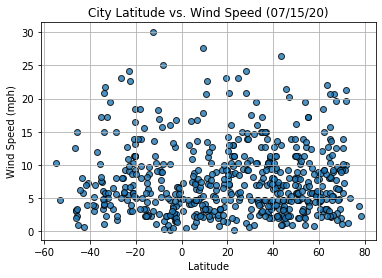

In [13]:
# Build the scatter plots for lat vs. wind
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [14]:
 # Create a function to create LR plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [15]:
 # Create North and South Hemisphere DF
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

In [16]:
#Max Temp vs. Lat LR

The r-squared is: 0.4915045237433493


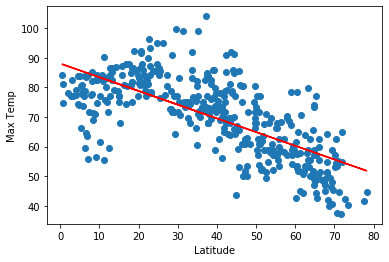

In [17]:
# LR on North Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-squared is: 0.6453063537134701


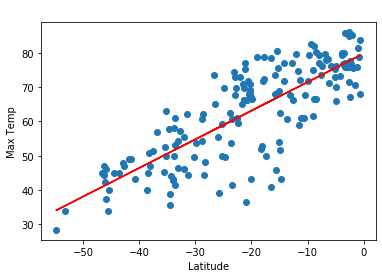

In [18]:
# LR on South Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

In [19]:
#Humid vs. Lat LR

The r-squared is: 7.0192613626693e-05


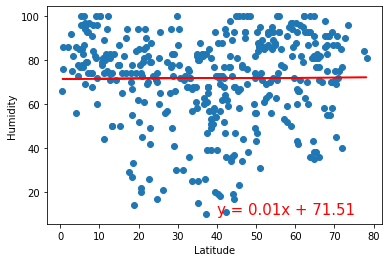

In [20]:
# North Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.0013201755905742115


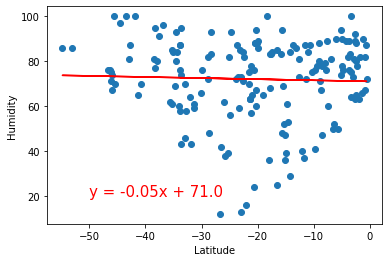

In [21]:
 # South Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

In [22]:
#Cloud vs. Lat LR

The r-squared is: 0.0016390022543938212


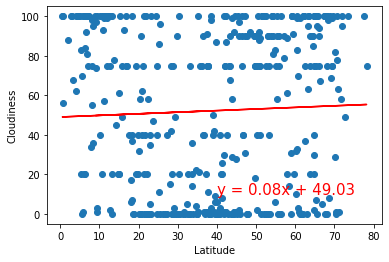

In [23]:
# North Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.01949261084711483


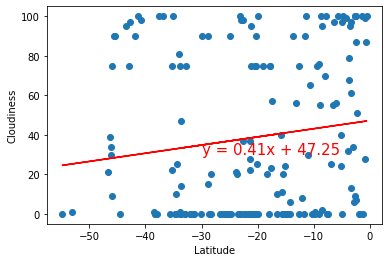

In [24]:
# South Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

In [25]:
#Wind vs. Lat LR

The r-squared is: 0.00013954483707239156


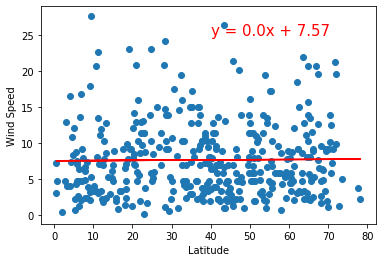

In [26]:
# North Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: 0.0020108312023049764


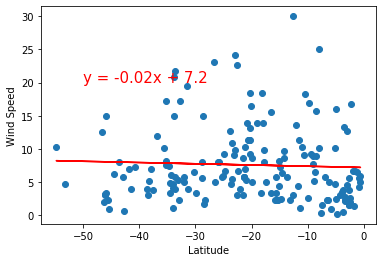

In [27]:
# South Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))